# CNN

### Instructions
- Make a copy of this notebook in your own Colab and complete the questions there.
- You can add more cells if necessary. You may also add descriptions to your code, though it is not mandatory.
- Make sure the notebook can run through by *Runtime -> Run all*. **Keep all cell outputs** for grading.


Install PyTorch and Skorch.

In [ ]:
!pip install -q torch skorch torchvision torchtext


In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchvision
import skorch
import sklearn
import numpy as np
import matplotlib.pyplot as plt

## 1. Tensor Operations (20 points)

Tensor operations are important in deep learning models. In this part, you are required to implement some common tensor operations in PyTorch.

### 1) Tensor squeezing, unsqueezing and viewing

Tensor squeezing, unsqueezing and viewing are important methods to change the dimension of a Tensor, and the corresponding functions are [torch.squeeze](https://pytorch.org/docs/stable/torch.html#torch.squeeze), [torch.unsqueeze](https://pytorch.org/docs/stable/torch.html#torch.unsqueeze) and [torch.Tensor.view](https://pytorch.org/docs/stable/tensors.html#torch.Tensor.view). Please read the documents of the functions, and finish the following practice.

In [ ]:
# x is a tensor with size being (3, 2)
x = torch.Tensor([[1, 2], [3, 4], [5, 6]])
print(x)

# Add two new dimensions to x by using the function torch.unsqueeze, so that the size of x becomes (3, 1, 2, 1).
x = torch.unsqueeze(x, 1)
x = torch.unsqueeze(x, 3)

print(x.size())

# Remove the two dimensions justed added by using the function torch.squeeze, and change the size of x back to (3, 2).
x = torch.squeeze(x)
print(x.shape)
# x is now a two-dimensional tensor, or in other words a matrix. Now use the function torch.Tensor.view and change x to a one-dimensional vector with size being (6).
x = x.view(-1)
print(x)
print(x.shape)

tensor([[1., 2.],
        [3., 4.],
        [5., 6.]])
torch.Size([3, 1, 2, 1])
torch.Size([3, 2])
tensor([1., 2., 3., 4., 5., 6.])
torch.Size([6])


### 2) Tensor concatenation and stack

Tensor concatenation and stack are operations to combine small tensors into big tensors. The corresponding functions are [torch.cat](https://pytorch.org/docs/stable/torch.html#torch.cat) and [torch.stack](https://pytorch.org/docs/stable/torch.html#torch.stack). Please read the documents of the functions, and finish the following practice.

In [ ]:
# x is a tensor with size being (3, 2)
x = torch.Tensor([[1, 2], [3, 4], [5, 6]])
print(x.shape)
# y is a tensor with size being (3, 2)
y = torch.Tensor([[-1, -2], [-3, -4], [-5, -6]])

# Our goal is to generate a tensor z with size as (2, 3, 2), and z[0,:,:] = x, z[1,:,:] = y.

# Use torch.stack to generate such a z
z = torch.stack([x, y], dim=0)
z.shape
print(z[0,:,:])
# Use torch.cat and torch.unsqueeze to generate such a z
x = torch.unsqueeze(x, 0)
print(x.shape)
y = torch.unsqueeze(y, 0)
z = torch.cat([x, y], dim=0)
print(z[0,:,:])

torch.Size([3, 2])
tensor([[1., 2.],
        [3., 4.],
        [5., 6.]])
torch.Size([1, 3, 2])
tensor([[1., 2.],
        [3., 4.],
        [5., 6.]])


### 3) Tensor expansion

Tensor expansion is to expand a tensor into a larger tensor along singleton dimensions. The corresponding functions are [torch.Tensor.expand](https://pytorch.org/docs/stable/tensors.html#torch.Tensor.expand) and [torch.Tensor.expand_as](https://pytorch.org/docs/stable/tensors.html#torch.Tensor.expand_as). Please read the documents of the functions, and finish the following practice. 

In [ ]:
# x is a tensor with size being (3)
x = torch.Tensor([1, 2, 3])
print(x.shape)


# Our goal is to generate a tensor z with size (2, 3), so that z[0,:,:] = x, z[1,:,:] = x.

# seems the question meant that the size of tensor z is (2,2,3)

# [TO DO]
# Change the size of x into (1, 3) by using torch.unsqueeze.
x = x.unsqueeze(0)
print(x.shape)
print(x)
print('')
# [TO DO]
# Then expand the new tensor to the target tensor by using torch.Tensor.expand.
z = torch.Tensor.expand(x,2,3)
print(z)
print(z.shape)


torch.Size([3])
torch.Size([1, 3])
tensor([[1., 2., 3.]])

tensor([[1., 2., 3.],
        [1., 2., 3.]])
torch.Size([2, 3])


### 4) Tensor reduction in a given dimension

In deep learning, we often need to compute the mean/sum/max/min value in a given dimension of a tensor. Please read the document of [torch.mean](https://pytorch.org/docs/stable/torch.html#torch.mean), [torch.sum](https://pytorch.org/docs/stable/torch.html#torch.sum), [torch.max](https://pytorch.org/docs/stable/torch.html#torch.max), [torch.min](https://pytorch.org/docs/stable/torch.html#torch.min), [torch.topk](https://pytorch.org/docs/stable/torch.html#torch.topk), and finish the following practice.

In [ ]:
# x is a random tensor with size being (10, 50)
x = torch.randn(10, 50)
print(x.shape)
# Compute the mean value for each row of x.
# You need to generate a tensor x_mean of size (10), and x_mean[k, :] is the mean value of the k-th row of x.
x_mean = x.mean(dim=1)
print(x_mean.shape)
# Compute the sum value for each row of x.
# You need to generate a tensor x_sum of size (10).
x_sum = x.sum(dim=1)
print(x_sum.shape)
# Compute the max value for each row of x.
# You need to generate a tensor x_max of size (10).
x_max = x.max(dim=1).values

print(x_max.shape)
# Compute the min value for each row of x.
# You need to generate a tensor x_min of size (10).
x_min = x.min(dim=1).values

print(x_min.shape)
# Compute the top-5 values for each row of x.
# You need to generate a tensor x_mean of size (10, 5), and x_top[k, :] is the top-5 values of each row in x.
x_top, _ = x.topk(k=5, dim=1)
print(x_top.shape)

torch.Size([10, 50])
torch.Size([10])
torch.Size([10])
torch.Size([10])
torch.Size([10])
torch.Size([10, 5])


## Convolutional Neural Networks (40 points)



Implement a convolutional neural network for image classification on CIFAR-10 dataset.

CIFAR-10 is an image dataset of 10 categories. Each image has a size of 32x32 pixels. The following code will download the dataset, and split it into `train` and `test`. For this question, we use the default validation split generated by Skorch.

In [ ]:
train = torchvision.datasets.CIFAR10("./data", train=True, download=True)
test = torchvision.datasets.CIFAR10("./data", train=False, download=True)

Files already downloaded and verified
Files already downloaded and verified


The following code visualizes some samples in the dataset. You may use it to debug your model if necessary.

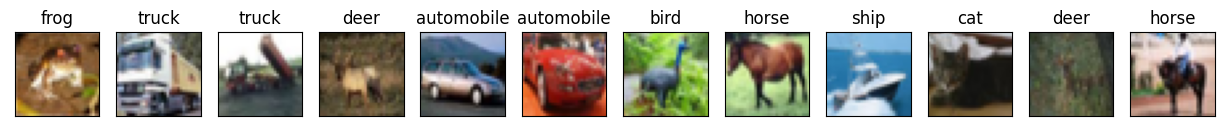

In [ ]:
# def plot(data, labels=None, num_sample=5):
#   n = min(len(data), num_sample)
#   for i in range(n):
#     plt.figure(figsize=(10,10))
#     plt.subplot(1, num_sample, i+1)
#     plt.imshow(data[i], cmap="gray")
#     plt.xticks([])
#     plt.yticks([])
#     if labels is not None:
#       plt.title(labels[i])

def plot(data, labels=None, num_sample=5):
  n = min(len(data), num_sample)
  fig, axs = plt.subplots(1,num_sample,figsize=(8, 8), dpi=100)
  for i, ax in enumerate(axs):
    ax.imshow(data[i], cmap="gray")
    # plt.figure(figsize=(10,10))
    # for i, ax in enumerate(axs.flat):
    # plt.subplot(1, num_sample, i+1)
    ax.imshow(data[i], cmap="gray")
    ax.set_xticks([])
    ax.set_yticks([])
    if labels is not None:
      ax.set_title(labels[i])
  plt.subplots_adjust(hspace=0.5, left=1, right=2.5)
  plt.show()


train.labels = [train.classes[target] for target in train.targets]
plot(train.data, train.labels,num_sample=12)






### 1) Basic CNN implementation


Consider a basic CNN model

- It has 3 convolutional layers, followed by a linear layer.
- Each convolutional layer has a kernel size of 3, a padding of 1.
- ReLU activation is applied on every hidden layer.

Please implement this model in the following section. You will need to tune the hyperparameters and fill the results in the table.

#### a) Implement convolutional layers

Implement the initialization function and the forward function of the CNN.

In [ ]:
# find the input size
train.data[1].shape
train.data.shape

(50000, 32, 32, 3)

In [ ]:
class CNN(nn.Module):
    def __init__(self,channel):
        super(CNN, self).__init__()
        self.conv1 = nn.Conv2d(in_channels=3, out_channels=channel, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(in_channels=channel, out_channels=channel, kernel_size=3, padding=1)
        self.conv3 = nn.Conv2d(in_channels=channel, out_channels=channel, kernel_size=3, padding=1)
        self.linear = nn.Linear(in_features=32*32*channel, out_features=10)
        
        self.relu = nn.ReLU()
        
    def forward(self, x):
        x = self.conv1(x)
        x = self.relu(x)
        x = self.conv2(x)
        x = self.relu(x)
        x = self.conv3(x)
        x = self.relu(x)
        x = x.view(x.size(0), -1)  # make the Tensor flat
        x = self.linear(x) # fully connected layer ( dense layer )
        return x

#### b) Tune hyperparameters

In [ ]:
train.data.shape
# X = train.data.astype(np.float64)
# train_data = torch.from_numpy(train.data)
# X.shape

# train_data = train_data.type(torch.float32)
# train_data = train_data.float() / 255.0
# train_data = train_data.numpy()
train_targets = np.array(train.targets)

tensor = torch.from_numpy(train.data)
print(tensor.shape)
print(tensor[0])

torch.Size([50000, 32, 32, 3])
tensor([[[ 59,  62,  63],
         [ 43,  46,  45],
         [ 50,  48,  43],
         ...,
         [158, 132, 108],
         [152, 125, 102],
         [148, 124, 103]],

        [[ 16,  20,  20],
         [  0,   0,   0],
         [ 18,   8,   0],
         ...,
         [123,  88,  55],
         [119,  83,  50],
         [122,  87,  57]],

        [[ 25,  24,  21],
         [ 16,   7,   0],
         [ 49,  27,   8],
         ...,
         [118,  84,  50],
         [120,  84,  50],
         [109,  73,  42]],

        ...,

        [[208, 170,  96],
         [201, 153,  34],
         [198, 161,  26],
         ...,
         [160, 133,  70],
         [ 56,  31,   7],
         [ 53,  34,  20]],

        [[180, 139,  96],
         [173, 123,  42],
         [186, 144,  30],
         ...,
         [184, 148,  94],
         [ 97,  62,  34],
         [ 83,  53,  34]],

        [[177, 144, 116],
         [168, 129,  94],
         [179, 142,  87],
         ...,
   

Train the CNN model on CIFAR-10 dataset. Tune the number of channels, optimizer, learning rate and the number of epochs for best validation accuracy.

In [ ]:
# implement hyperparameters here
channels = [128, 256, 512]
optimizers = [optim.Adam, optim.SGD]

# implement input normalization & type cast here
tensor_float = tensor.type(torch.float32)/255.0
tensor_float_reshaped = tensor_float.reshape(50000, 3, 32, 32)
train_x = torch.Tensor(train.data).permute(0,3,2,1)
for channel in channels :
  for optimizer in optimizers :
    model = skorch.NeuralNetClassifier(module=CNN, criterion=torch.nn.CrossEntropyLoss,optimizer=optimizer, module__channel = channel,device='cuda')
    print('training number of channel for each layer is :  {} and optimizer is : {}'.format(channel,optimizer))
    model.fit(train_x/255.0, train_targets)

training number of channel for each layer is :  128 and optimizer is : <class 'torch.optim.adam.Adam'>
  epoch    train_loss    valid_acc    valid_loss      dur
-------  ------------  -----------  ------------  -------
      1        7.5126       0.2449        2.0636  16.3976
      2        1.9501       0.3266        1.8585  12.3575
      3        1.7627       0.4040        1.6837  12.4230
      4        1.6192       0.4325        1.5622  12.4758
      5        1.5408       0.4452        1.5339  12.5221
      6        1.4042       0.4595        1.5014  12.5605
      7        1.3405       0.4467        1.5808  12.8619
      8        1.2752       0.4505        1.6052  12.8062
      9        1.2252       0.4387        1.7497  12.6028
     10        1.1686       0.4303        1.8220  12.5907
training number of channel for each layer is :  128 and optimizer is : <class 'torch.optim.sgd.SGD'>
  epoch    train_loss    valid_acc    valid_loss      dur
-------  ------------  -----------  ------

Write down **validation accuracy** of your model under different hyperparameter settings. Note the validation set is automatically split by Skorch during `model.fit()`.

**Hint:** You may need more epochs for SGD than Adam.

| #channel for each layer \ optimizer | SGD   | Adam  |
|-------------------------------------|-------|-------|
| (128, 128, 128)                     |    55%   |   43%    |
| (256, 256, 256)                     |    57%   |   46%    |
| (512, 512, 512)                     |   58%    |  10%     |


### 2) Full CNN implementation

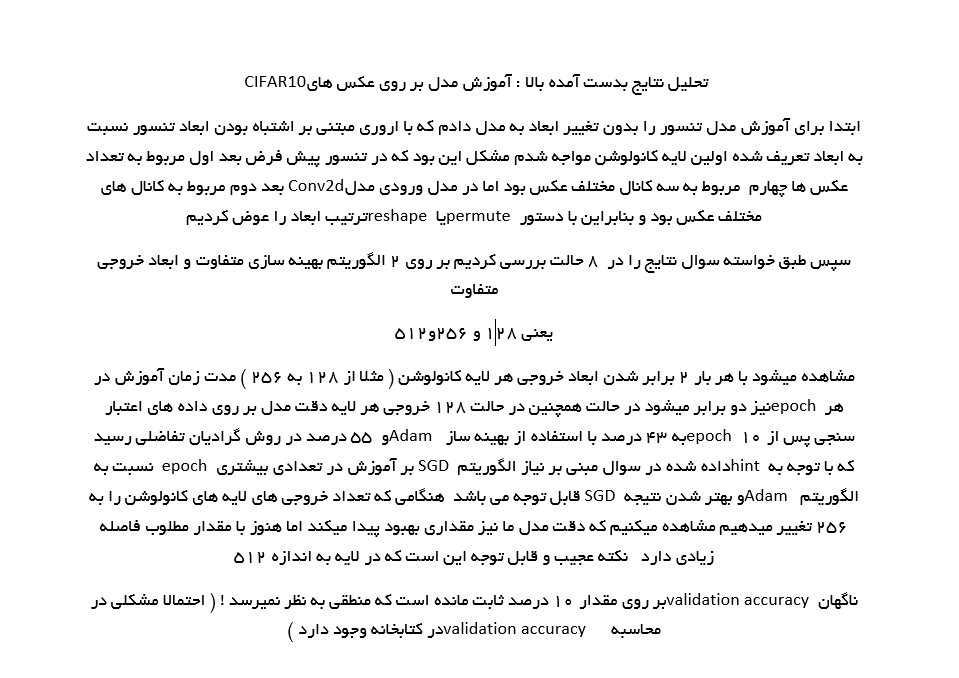

Based on the CNN in the previous question, implement a full CNN model with max pooling layer.

- Add a max pooling layer after each convolutional layer.
- Each max pooling layer has a kernel size of 2 and a stride of 2.

Please implement this model in the following section. You will need to tune the hyperparameters and fill the results in the table. You are also required to complete the questions.

#### a) Implement max pooling layers

Copy the CNN implementation in previous question. Implement max pooling layers.

In [ ]:
class CNN_MaxPool(nn.Module):
  def __init__(self, in_channel, out_channel_1, out_channel_2, out_channel_3):
    super(CNN_MaxPool, self).__init__()
    # implement parameter definitions here
    self.conv1 = nn.Conv2d(in_channel, out_channel_1, kernel_size=3, padding=1)
    self.conv2 = nn.Conv2d(out_channel_1, out_channel_2, kernel_size=3, padding=1)
    self.conv3 = nn.Conv2d(out_channel_2, out_channel_3, kernel_size=3, padding=1)
    self.pool = nn.MaxPool2d(stride = 2, kernel_size = 2)
    self.linear = nn.Linear(out_channel_3 * 4 * 4, 10) # fully connected ( dense layer)
    self.relu = nn.ReLU()
  def forward(self, x):
    # implement the forward function here
    x = self.conv1(x)
    x = self.relu(x)
    x = self.pool(x)
    x = self.conv2(x)
    x = self.relu(x)
    x = self.pool(x)
    x = self.conv3(x)
    x = self.relu(x)
    x = self.pool(x)
    x = x.view(x.size(0), -1) 
    x = self.linear(x)
    return x

#### b) Tune hyperparameters

Based on best optimizer you found in the previous problem, tune the number of channels and learning rate for best validation accuracy.

In [ ]:
# implement hyperparameters here
model = skorch.NeuralNetClassifier(CNN_MaxPool,
                                   criterion=torch.nn.CrossEntropyLoss,optimizer = optim.Adam , module__in_channel = 3 , module__out_channel_1 = 128,
                                   module__out_channel_2 = 128,module__out_channel_3 = 128,
                                   device="cuda")
# implement input normalization & type cast here
print(" channel for each layer 128 , 128 , 128 max pooling 2 each layer ")
model.fit(train_x/255.0, train_targets)

model = skorch.NeuralNetClassifier(CNN_MaxPool,
                                   criterion=torch.nn.CrossEntropyLoss,optimizer = optim.Adam , module__in_channel = 3 
                                   , module__out_channel_1 = 128,module__out_channel_2 = 256,module__out_channel_3 = 512,
                                   device="cuda")
# implement input normalization & type cast here
print(" channel for each layer 128 , 256 , 512 max pooling 2 each layer ")
model.fit(train_x/255.0, train_targets)




model = skorch.NeuralNetClassifier(CNN_MaxPool,
                                   criterion=torch.nn.CrossEntropyLoss,optimizer = optim.Adam , module__in_channel = 3 , module__out_channel_1 = 256,
                                   module__out_channel_2 = 256,module__out_channel_3 = 256,
                                   device="cuda")
# implement input normalization & type cast here
print(" channel for each layer 256 , 256 , 256 max pooling 2 each layer ")
model.fit(train_x/255.0, train_targets)


 channel for each layer 128 , 128 , 128 max pooling 2 each layer 
  epoch    train_loss    valid_acc    valid_loss     dur
-------  ------------  -----------  ------------  ------
      1        1.8871       0.4713        1.4720  4.4694
      2        1.3538       0.5355        1.3091  4.3857
      3        1.2476       0.5425        1.3164  4.3840
      4        1.1945       0.5883        1.1921  4.3886
      5        1.1488       0.5875        1.1945  4.3843
      6        1.1111       0.5934        1.1886  4.4118
      7        1.0909       0.5761        1.2413  4.3991
      8        1.0770       0.5650        1.2602  4.4066
      9        1.0670       0.5954        1.2023  4.4086
     10        1.0562       0.5844        1.2219  4.4115
 channel for each layer 128 , 256 , 512 max pooling 2 each layer 
  epoch    train_loss    valid_acc    valid_loss     dur
-------  ------------  -----------  ------------  ------
      1        3.1801       0.4243        1.6075  8.5115
      2      

<class 'skorch.classifier.NeuralNetClassifier'>[initialized](
  module_=CNN_MaxPool(
    (conv1): Conv2d(3, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (conv2): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (conv3): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (linear): Linear(in_features=4096, out_features=10, bias=True)
    (relu): ReLU()
  ),
)

In [ ]:
model2 = skorch.NeuralNetClassifier(CNN_MaxPool,
                                   criterion=torch.nn.CrossEntropyLoss,optimizer = optim.Adam , module__in_channel = 3 , module__out_channel_1 = 512,
                                   module__out_channel_2 = 1024,module__out_channel_3 = 2048,
                                   device="cuda")
# implement input normalization & type cast here
print(" channel for each layer 512 , 1024 , 2048 max pooling 2 each layer ")
model2.fit(train_x/255.0, train_targets)


 channel for each layer 512 , 1024 , 2048 max pooling 2 each layer 
  epoch    train_loss    valid_acc    valid_loss      dur
-------  ------------  -----------  ------------  -------
      1       72.4831       0.4701        1.4503  54.3263
      2        1.3566       0.5217        1.3488  54.0740
      3        1.2413       0.5694        1.2204  54.2580
      4        1.1617       0.5976        1.1467  54.2695
      5        1.1131       0.5975        1.1473  54.1931
      6        1.0563       0.6163        1.1015  54.1891
      7        1.0274       0.6009        1.1583  54.1749
      8        1.0177       0.6231        1.1240  54.1716
      9        0.9763       0.6130        1.1510  54.2080
     10        0.9591       0.6185        1.1326  54.1685


<class 'skorch.classifier.NeuralNetClassifier'>[initialized](
  module_=CNN_MaxPool(
    (conv1): Conv2d(3, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (conv2): Conv2d(512, 1024, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (conv3): Conv2d(1024, 2048, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (linear): Linear(in_features=32768, out_features=10, bias=True)
    (relu): ReLU()
  ),
)

Write down the **validation accuracy** of your model under different hyperparameter settings.

| #channel for each layer | validation accuracy |
|-------------------------|---------------------|
| (128, 128, 128)         |          58%           |
| (128, 256, 512)         |        60%             |
| (256, 256, 256)         |     59%                |
| (256, 512, 1024)        |                     |
| (512, 512, 512)         |                     |
| (512, 1024, 2048)       |    61%                 |


For the best model you have, test it on the test set.

It is fine if you found some hyperparameter combination better than those listed in the tables.

In [ ]:
# implement the same input normalization & type cast here
print(test.data.shape)
test_data = torch.Tensor(test.data)
test_data = test_data.permute(0,3,2,1)/255.0
test_predictions = model2.predict(test_data)
sklearn.metrics.accuracy_score(test.targets, test_predictions)

(10000, 32, 32, 3)


0.6171

How much **test accuracy** do you get?

**Your Answer:**  61.71 %

What can you conclude for the design of CNN structure?

**Your Answer:**
 به نظر میرسد این شبکه توانایی پیش بینی بهتر از 61 درصد رو این داده ها را ندارد و هر اندازه اندازه خروجی لایه ها را بالا ببریم تاثیر چندانی ندارد

- **Subtask 2-1: Completing the Table**

We have provided the following table for different combinations of optimizers and learning rate, please write down the **validation accuracy** of your model with different optimizers and learning rates.

|         | 0.1  | 0.01 | 0.001|0.0001|
|---------|------|------|------|------|
| SGD     |      |      |      |      |
| Adam    |      |      |      |      |
| RMSprop |      |      |      |      |

- **Subtask 2-2: Explaining your Observations**

Based on your results, briefly explain your observations, e.g., which optimizer works the best, what is the optimal learning rate for each optimizer?

*Your Answer:*


### 3) Compare the Results under Different Epoches

In this task, we hope to compare the results of our model under different training epoches, and answer a question.

- **Subtask 3-1: Completing the Table**

We have provided the following table, please write down the **training accuracy** and **validation accuracy** of your model under different epoches.

|                    |  10  |  20  |  30  |  40  |  50  |
|--------------------|------|------|------|------|------|
| Training Accuracy  |      |      |      |      |      |
| Validation Accuracy|      |      |      |      |      |


- **Subtask 3-2: Answering the Question**

Is it always better to train a model for more epoches? How can we decide when should we stop training?

*Your Answer:*
خیر اگر مشاهده کنیم که مثلا بین دو
epoch 
متوالی عملکرد ( دقت) مدل بر روی داده های اعتبار سنجی بهبود زیادی پیدا نمیکند بهتر است فرایند آموزش را متوقف کنیم 